In [1]:
import sys

sys.path.insert(0, "../torch/")

import torch
import os
import re
from src.pre_trainer import Trainer
from src.datagen import CustomImageDataset
import pandas as pd
import numpy as np
import glob
import json
import matplotlib.pyplot as plt
import pickle as pkl
from pathlib import Path
from tqdm.auto import tqdm

/home/abetatos/miniconda3/envs/torch-py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.environ['displayprob'] = "0"
os.environ['Features'] = json.dumps(["DEM", "SCE", "Aspect", "Slope", "TPI", "TPIWGW", "DEMSNOW", "FFSNOW"])

In [3]:
basepath = "/home/abetatos/Escritorio/TFM_Dataset/"
model_basepath = "/home/abetatos/Escritorio/TFM_models/"

date = "20230523"
config = "256pixel_4ro"
model_id = "1684604492"

size = int(re.findall("\d+", config)[0])
dataset_path = f"/home/abetatos/Escritorio/TFM_Dataset/Dataset_{date}/{config}/"

# pred_model = "1685098495_model_54_01234567"
# pred_model = "1684923533_model_57_012345678"
pred_model = "1685536886_model_53_01234567"
modeltype = "withoutmask_all_sgd_adam"

In [4]:
df = pd.DataFrame([[f] for f in glob.glob(dataset_path + "Data/**/*.pickle", recursive=True)], columns=['filename'])
df['place'] = df['filename'].apply(lambda x: Path(x).name.split("__")[0])
df['col_off'] = df['filename'].apply(lambda x: Path(x).name.split("__")[-2]).astype(int)
df['row_off'] = df['filename'].apply(lambda x: Path(x).name.split("__")[-1].replace(".pickle", "")).astype(int)

In [5]:
trainer = Trainer("UpNet", "SGD", dataset_path)

trainer.init_trainer(ini_channels=8, out_channels=1, width=12, depth=7, lr=1e-3, eps=1e-4)

trainer.load_checkpoint(f"/home/abetatos/Escritorio/TFM_models/{modeltype}/{pred_model}.pt")

trainer.model.eval()

UpNet(
  (encoder0): Sequential(
    (0): Sequential(
      (0): Conv2d(8, 6, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): LeakyReLU(negative_slope=0.01, inplace=True)
      (2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (3): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (encoder1): Sequential(
    (0): Sequential(
      (0): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (1): LeakyReLU(negative_slope=0.01, inplace=True)
      (2): Conv2d(12, 24, kernel_size=(3, 3), stride=(1, 1), padding=same)
      (3): BatchNorm2d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (4): LeakyReLU(negative_slope=0.01, inplace=True)
    )
    (1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode

HS_Davos_20170316_2m_epsg2056


100%|██████████| 886/886 [01:55<00:00,  7.69it/s]


0.64417005


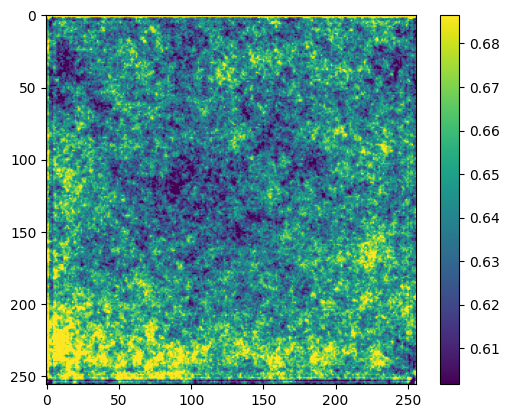

HS_Davos_20180411_2m_epsg2056


100%|██████████| 76/76 [00:09<00:00,  7.78it/s]


0.57733196


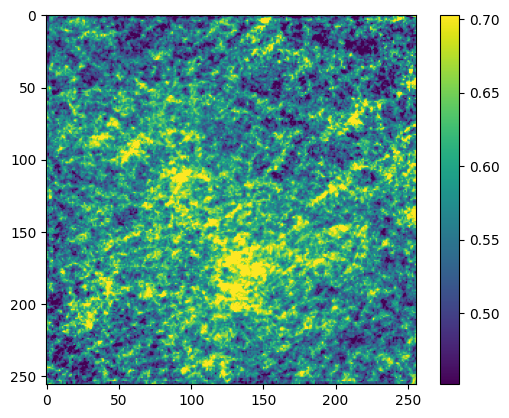

HS_Davos_20200406_2m_epsg2056


100%|██████████| 382/382 [00:49<00:00,  7.76it/s]


0.6066427


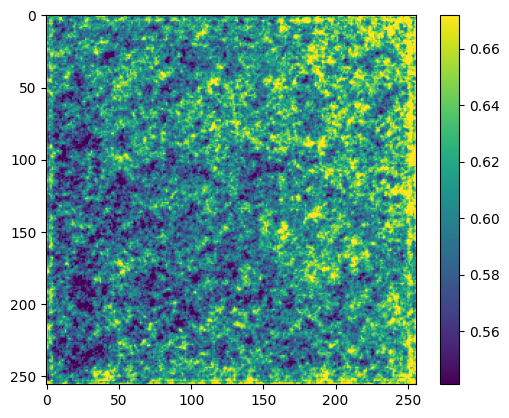

HS_Davos_20211604_2m_epsg2056


100%|██████████| 350/350 [00:45<00:00,  7.77it/s]


0.7631035


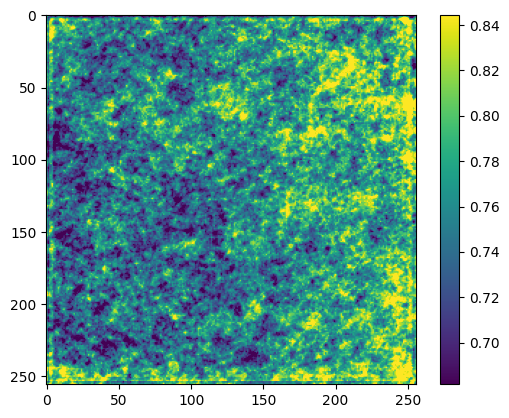

HS_Laucherenalp_20220224_2m_epsg2056


100%|██████████| 13/13 [00:01<00:00,  7.75it/s]


0.63394856


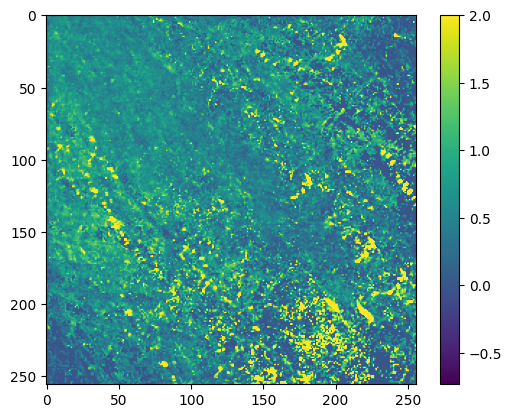

HS_Laucherenalp_20220511_1m_epsg2056


100%|██████████| 6/6 [00:00<00:00,  7.79it/s]


1.2809412


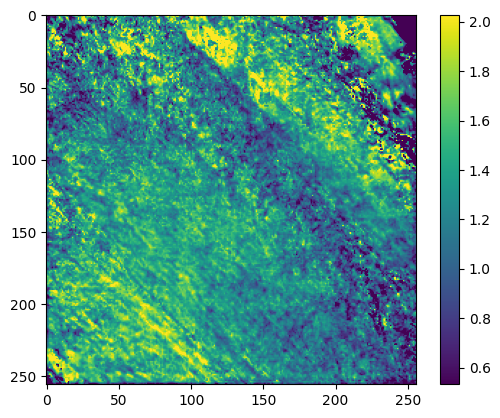

HS_Saflischpass_20220512_1m_epsg2056


100%|██████████| 8/8 [00:01<00:00,  7.74it/s]


2.2893558


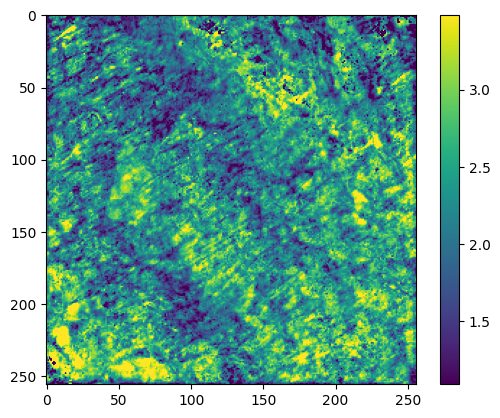

HS_c_20220223_1m_epsg2056


100%|██████████| 20/20 [00:02<00:00,  7.79it/s]


2.1656713


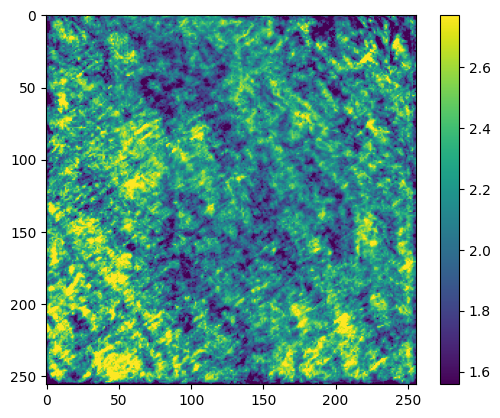

snowmap_2010_ads_80_extent_maskiert_nosnow0_noausreisser


100%|██████████| 305/305 [00:39<00:00,  7.76it/s]


1.0614741


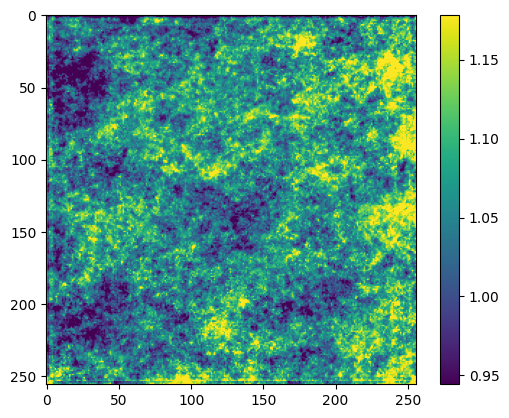

snowmap_2012_ads_80_extent_maskiert_nosnow0_noausreisser


100%|██████████| 314/314 [00:40<00:00,  7.74it/s]


0.76522624


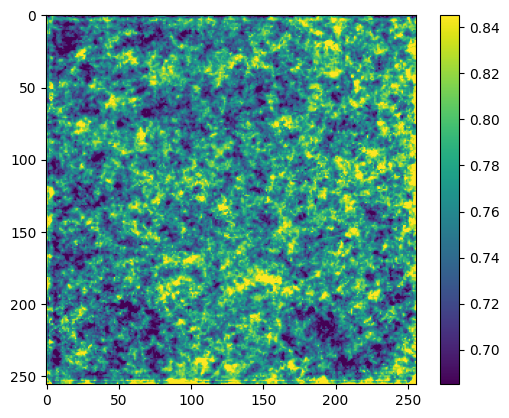

snowmap_2013_ads_80_extent_maskiert_nosnow0_noausreisser


100%|██████████| 313/313 [00:40<00:00,  7.71it/s]


0.5607922


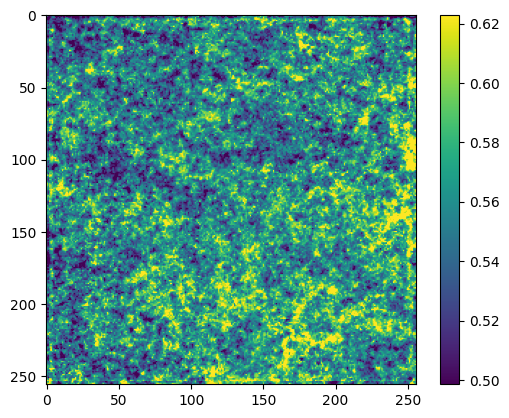

snowmap_2014_ads_100_extent_maskiert_nosnow0_noausreisser


100%|██████████| 272/272 [00:34<00:00,  7.78it/s]


0.5385974


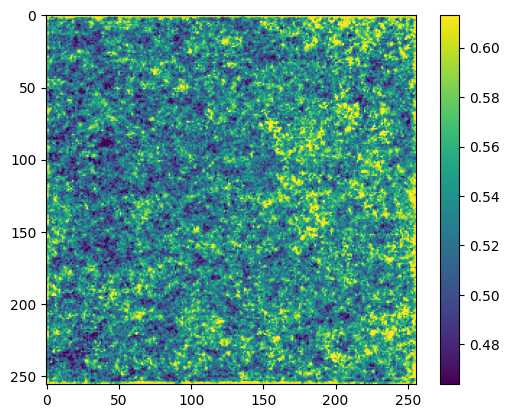

snowmap_2015_ads_100_extent_maskiert_nosnow0_noausreisser


100%|██████████| 276/276 [00:35<00:00,  7.81it/s]


0.56132567


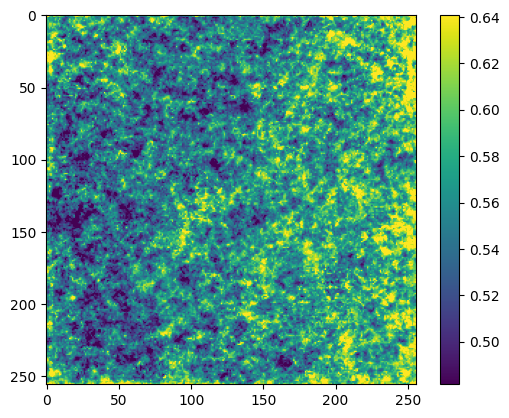

snowmap_20160126_ads_100_extent_maskiert_nosnow0_noausreisser


100%|██████████| 277/277 [00:35<00:00,  7.79it/s]


0.69322085


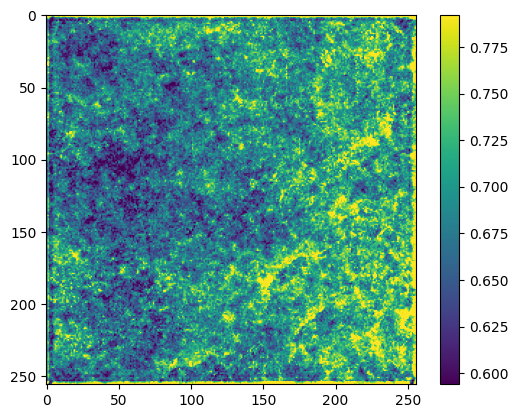

snowmap_20160309_ads_100_extent_maskiert_nosnow0_noausreisser


100%|██████████| 273/273 [00:35<00:00,  7.79it/s]


0.559083


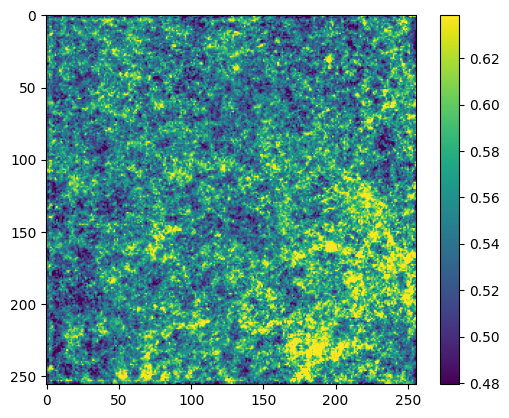

snowmap_20160420_ads_100_extent_maskiert_nosnow0_noausreisser


100%|██████████| 279/279 [00:35<00:00,  7.82it/s]


0.49917156


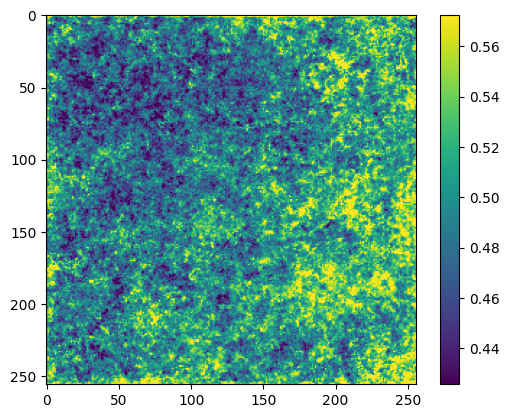

In [6]:
withmask = False
for place, place_df in df.groupby("place"):
    print(place)
    place_df.to_csv("tmp_df.csv")
    cid = CustomImageDataset("tmp_df.csv", index_vars = [0,1,2, 3, 4, 5, 6, 7])
    
    max_col_off = place_df['row_off'].max() + size
    max_row_off = place_df['col_off'].max() + size

    mapping = torch.zeros((max_col_off, max_row_off))
    counter = torch.zeros((max_col_off, max_row_off))
    errors = torch.zeros((256, 256))
    error_counter = torch.zeros((256, 256))
    for index, name in tqdm(cid.img_labels['filename'].items(), total=len(place_df)): 
        with torch.no_grad():
            inputfile, mask, output = [torch.from_numpy(c) for c in cid[index]]
            if withmask:
                inputfile = torch.cat((inputfile, torch.zeros((1, 256, 256))))
            inputfile, output = inputfile.to("cuda"), output.to("cuda")
            mask = mask.squeeze().squeeze()

            hs_map = inputfile.squeeze()[-1].to("cpu")
            pred = trainer.model(inputfile.unsqueeze(0)).squeeze().squeeze()

        row_off = place_df['row_off'].iloc[index]
        col_off = place_df['col_off'].iloc[index]

        mapping[row_off:row_off+size, col_off:col_off+size] += pred.to("cpu")
        counter[row_off:row_off+size, col_off:col_off+size] += mask
        diff = abs(pred - output.squeeze().squeeze()).to("cpu")
        errors += np.multiply(diff, mask)
        error_counter += mask

    errors = np.where(error_counter != 0, np.divide(errors, error_counter + 1e-10), 0)
    print(errors.mean())

    outpath = f"/home/abetatos/Escritorio/TFM_Dataset/5.Preds/{modeltype}_{pred_model}/{place}/"
    os.makedirs(outpath, exist_ok=True)
    with open(f"{outpath}HS_pred.pickle", "wb") as src: 
        norm_mapping = np.where(counter != 0, np.divide(mapping, counter + 1e-10), -9999.)
        pkl.dump(norm_mapping, src)

    plt.imshow(errors, cmap="viridis", vmax=errors.mean() + errors.std()*2, vmin=errors.mean() - errors.std()*2)
    plt.colorbar()
    plt.show()